<a href="https://colab.research.google.com/github/umairnsr87/Hitachi-DataEngineer-Challenge-HackerEarth/blob/master/data_engineer_hitachi_HYPERTUNED_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
test = pd.read_csv('Test_1.csv')
train = pd.read_csv('Train_1.csv')


In [0]:
axx = pd.read_csv('Test_1.csv')
id_code = axx["id_code"]
del axx

In [0]:
train["mean_halt_times_source"].fillna(640.265896,inplace=True)
train["latitude_source"].fillna(50.859663,inplace=True)
train["longitude_source"]=train["longitude_source"].fillna(4.360846)
train["country_code_source"].fillna("whber",inplace=True)
train["country_code_destination"].fillna("whber",inplace=True)
train["mean_halt_times_destination"].fillna(164.41907514451,inplace=True)
train.dropna(axis=0,how='any',inplace=True)

In [78]:
train.isna().sum()

id_code                        0
current_date                   0
current_time                   0
source_name                    0
destination_name               0
train_name                     0
target                         0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
dtype: int64

In [79]:
train.shape,test.shape

((1251, 19), (964, 18))

In [0]:
#removing the target
train.reset_index(inplace=True,drop=True)
Y_train=train["target"].map({'low':0,'high':2,'medium':1})

#joining both train and test data for data cleaning
train["data"]="train"
train.drop(["target"],axis=1,inplace=True)
test["data"]="test"
data=pd.concat((train,test),ignore_index=True,axis=0)

In [81]:
#lets start to change the type of the data so that we can convert it into machine learning formal
data['source_name']=data['source_name'].str.replace("station","",case=False)
data['source_name']=data['source_name'].str.replace("$","")

#now change it from test and train
data['destination_name']=data['destination_name'].str.replace("station","",case=False)
data['destination_name']=data['destination_name'].str.replace("$","")

#now changing the datatype of these columns
data['source_name']=pd.to_numeric(data['source_name'])
data['destination_name']=pd.to_numeric(data['destination_name'])

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Data columns (total 19 columns):
id_code                        2215 non-null object
current_date                   2215 non-null object
current_time                   2215 non-null object
source_name                    2215 non-null int64
destination_name               2215 non-null int64
train_name                     2215 non-null object
country_code_source            2215 non-null object
longitude_source               2215 non-null float64
latitude_source                2215 non-null float64
mean_halt_times_source         2215 non-null float64
country_code_destination       2215 non-null object
longitude_destination          2215 non-null float64
latitude_destination           2215 non-null float64
mean_halt_times_destination    2215 non-null float64
current_year                   2215 non-null int64
current_week                   2215 non-null int64
current_day                    2215 non-null object
is_week

In [0]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


In [0]:
#mapping the data on unique values
data["country_code_source"]=data["country_code_source"].map({'whber':1, 'qwnll':2,'wsluu':3,'logbp':4})
data["country_code_source"]=pd.to_numeric(data["country_code_source"])

In [84]:
data["country_code_destination"].unique()

array(['whber', 'aqfre', 'qwnll', 'zxdec', 'logbp', 'wsluu'], dtype=object)

In [0]:
#changing the data of destination
data["country_code_destination"]=data["country_code_destination"].map({'whber':1, 'qwnll':2,'wsluu':3,
                                                                  'logbp':4,'aqfre':5,'zxdec':6})
data["country_code_destination"]=pd.to_numeric(data["country_code_destination"])


In [0]:
data["current_day"]=data["current_day"].map({'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 
                         'Saturday':6, 'Sunday':7})
data["current_day"]=pd.to_numeric(data["current_day"])

In [87]:
data.tail(5)

,id_code,current_date,current_time,source_name,destination_name,train_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,data
2210,pnfrvyxsejnehwu,2016-10-29,09:14:45 AM,544,530,ICZVXA,1,3.710675,51.035896,309.014451,1,3.447848,51.092295,78.488439,2016,43,6,True,test
2211,omsilbnrgbvkeak,2016-10-29,10:17:59 AM,530,544,ICZVZA,1,3.447848,51.092295,78.488439,1,3.710675,51.035896,309.014451,2016,43,6,True,test
2212,vkjvqmaaguaeqde,2016-10-29,10:39:10 AM,178,147,ICRYYW,1,4.421101,51.217200,467.982659,1,4.356801,50.845658,634.164740,2016,43,6,True,test
2213,iutnjhogthfpymb,2016-10-29,10:59:55 AM,147,150,ICZVXY,1,4.356801,50.845658,634.164740,1,4.336531,50.835707,686.615607,2016,43,6,True,test
2214,xwqxedeqlnimclu,2016-10-29,11:48:37 AM,525,536,ICZVXW,1,3.216726,51.197226,164.419075,1,3.133864,51.312432,21.416185,2016,43,6,True,test


In [0]:
#feature engineering for date and time
#we are not doing more beacause there are several detailed columns are already present in the dataset
#data["date_and_time_combined"]=+" "+data["current_time"]
#data["current_date"]=pd.to_datetime(data["current_date"])


#getting the current month
xx=data["current_date"].str.split("-",expand=True)

data["current_month"]=xx[1]


In [89]:
data.isna().sum()

id_code                        0
current_date                   0
current_time                   0
source_name                    0
destination_name               0
train_name                     0
country_code_source            0
longitude_source               0
latitude_source                0
mean_halt_times_source         0
country_code_destination       0
longitude_destination          0
latitude_destination           0
mean_halt_times_destination    0
current_year                   0
current_week                   0
current_day                    0
is_weekend                     0
data                           0
current_month                  0
dtype: int64

In [0]:
#getting the hours of the time and converting it nto 24 hours format
a=data["current_time"].str.split(':',expand=True)
b=a[2].str.split(" ",expand=True)
a=a[0]
a=pd.to_numeric(a)
xx=np.where(b[1]=='AM',a+12,a)
xx=np.where(xx==24,0,xx)

hours=pd.DataFrame(xx)
data["hours_of_the_time"]=hours
del hours,xx
data.drop(["current_date","current_time",'id_code'],axis=1,inplace=True)

In [0]:
#changing the weekend into binary column
#data["is_weekend"].unique()
data["is_weekend"]=np.where(data["is_weekend"]==False,0,1)
data["is_weekend"]=pd.to_numeric(data["is_weekend"])

In [0]:
#making dummies for the train names for the trains which have values more that 5
#cat_cols=["train_name"]
#for col in cat_cols:
 #   freqs=data[col].value_counts()
  #  k=freqs.index[freqs>5][:-1]
   # for cat in k:
    #    name=col+'_'+cat
     #   data[name]=(data[col]==cat).astype(int)
    #del data[col]
    #print(col)



#we are deleting the train name for now 
# we will include the code when we will deal with the modelling process
del data["train_name"]

In [0]:
#converting the target into one hot encoding as it is a multiclass problem
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(handle_unknown='ignore')
#encoder.fit_transform(target)
#from sklearn.preprocessing import MultiLabelBinarizer
#MultiLabelBinarizer().fit_transform(target)


In [0]:
#from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
#ss=StandardScaler()
##rs=RobustScaler()
#ms=MinMaxScaler()

In [94]:
#getting the training and testing data into the original form
train=data[data['data']=='train']
test=data[data['data']=='test']
print(train.shape,test.shape)
train.drop(['data'],axis=1,inplace=True)
test.drop(['data'],axis=1,inplace=True)
print(train.shape,test.shape)


(1251, 17) (964, 17)
(1251, 16) (964, 16)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
#train=ss.fit_transform(train)
#test=ss.fit_transform(test)

In [96]:
data.head()

,source_name,destination_name,country_code_source,longitude_source,latitude_source,mean_halt_times_source,country_code_destination,longitude_destination,latitude_destination,mean_halt_times_destination,current_year,current_week,current_day,is_weekend,data,current_month,hours_of_the_time
0,130,214,1,4.360846,50.859663,640.265896,1,4.482785,51.017648,306.523121,2016,30,3,0,train,07,11
1,248,248,1,5.497685,50.967057,39.476879,1,5.497685,50.967057,39.476879,2016,30,4,0,train,07,0
2,248,147,1,5.497685,50.967057,39.476879,1,4.356801,50.845658,634.164740,2016,30,4,0,train,07,0
3,177,130,1,4.482076,50.896456,171.020231,1,4.360846,50.859663,640.265896,2016,30,4,0,train,07,0
4,544,147,1,3.710675,51.035896,309.014451,1,4.356801,50.845658,634.164740,2016,30,4,0,train,07,20


In [0]:
#we are commentig this beacuse we have joined the (target)
#column because of eda to the datset

#train["target"]=target
#train["target"]=train["target"].map({'low':0,'high':2,'medium':1})



In [0]:
#sns.pairplot(train)

In [0]:
# hours_of_the time vs target 
#plt.figure(figsize=(10,8))
#sns.scatterplot(y=train["hours_of_the_time"],x=train["is_weekend"],hue=train["target"])
#plt.xlabel("weekends")
#plt.ylabel("hours in a day")
#plt.title("Hours in a day vs Weekoffs load ")
#as we can clearly see that on the working days the volumns is high at the time where people go to office andgo to home
#and on weekoffs the traffic is high in the morning and at afternoon
#there might be several reasons on the weekoff(Maybe the people are going to their native town or shopping)

In [0]:
#target vs destination name

#plt.figure(figsize=(9,6))
#sns.lineplot(y=train["target"], x=train['destination_name'])
#plt.xlabel("station location code")
#plt.ylabel("target in 0(low) ,1(medium),2(high)")
#plt.title("destination station name vs the volume")
#by this graph we can clearly see that as the stations are increasing the population volume is getting low
#this means that there are less number of people who atre commuting from very far places as compares to nearby places


In [0]:
#hours_of_the_time vs  mean_halt_source
#plt.figure(figsize=(6,6))
#sns.lineplot(x=train["hours_of_the_time"],y=train["mean_halt_times_source"])

#plt.xlabel("time in the day in 24 hours")
#plt.ylabel("Number of halt times")
#plt.title("Times the train halted on the day from 00:00-23:59:59")
#as we can see tthat the train halted nearly 13:00-17:00 the most
#it means the traffic would be the most at this time


In [0]:
#latitude source to latitude destination vs volume of the traffic
#plt.figure(figsize=(6,6))
#sns.lineplot(x=train["latitude_source"],y=train["latitude_destination"],hue=train["target"])
#we can clearly see that the major high volume between(50.25 to 51.25 latitude)
#we can clearly see that the normal volume between(49.75 to 51.50 latitude)
#we can clearly see that the normal volume between(49.75 to 51.50 latitude)




In [0]:
#latitude source to latitude destination vs volume of the traffic
#plt.figure(figsize=(6,6))
#sns.lineplot(x=train["longitude_source"],y=train["longitude_destination"],hue=train["target"])
#we can clearly see that the major high volume between(3 to 6 longitude)
#we can clearly see that the normal volume between(0 to 6 longitude)
#we can clearly see that the normal volume between(49.75 to 51.50 latitude)

In [0]:
#current_month vs the traffic vs week
#plt.figure(figsize=(6,6))
#sns.lineplot(train["mean_halt_times_source"],train["mean_halt_times_destination"],hue=train["target"])
#mean_halt times source and destination is alot
#this means there are alot of persons who prefer the train destination alot

In [0]:
#sns.kdeplot(train["current_month"])
# the frequesncy of september is more than in other months


In [0]:
#sns.lineplot(train["current_month"],train["mean_halt_times_source"])
#sns.lineplot(train["current_month"],train["mean_halt_times_destination"])
#plt.ylabel("mean halt time source and destination")

#we can clearly see that mean halt time is less both for source and destination in august(08) and maximum in july(07) 

In [0]:
#destination name vs target
#sns.lineplot(y=train["destination_name"],x=train["target"],hue=train["is_weekend"])

In [0]:
#train.drop(["current_year"],axis=1,inplace=True)
#test.drop(["current_year"],axis=1,inplace=True)

In [0]:
#function to get variable importances
def plot_graph(a):
    plt.figure(figsize=(10,10))
    chart=sns.barplot(x=a["name_of_column"],y=a["feature_importance"])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
def feature_importance_plot_rev(dataframe,classifier,limit_of_the_importance):
    x=list(zip(dataframe.columns,classifier.feature_importances_))
    xx=pd.DataFrame(x)
    xx.columns=["name_of_column","feature_importance"]
    xx=xx.sort_values("feature_importance",ascending=False)
    xx=xx[xx["feature_importance"]>limit_of_the_importance]
    plot_graph(xx)
    return xx

In [105]:
#training a model for getting the important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#defining the classifier for feature importance
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()

#saperating the train and test data
#X_train=train.drop(["target"],axis=1)
#Y_train=train["target"]

#fitting our model for variable importance
rfc.fit(train,Y_train)
dtc.fit(train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

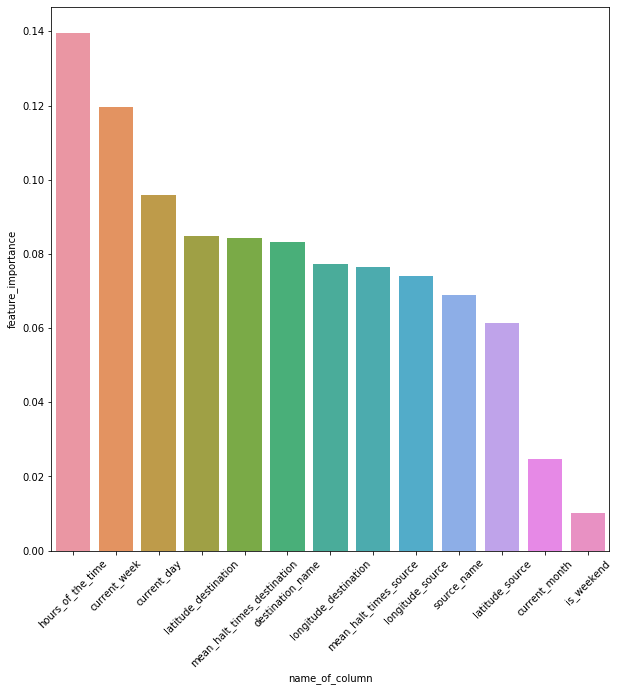

In [106]:
#getting the feature importance from random Forests classifier
variable_importance_df=feature_importance_plot_rev(train,dtc,0)


In [0]:
list1=list(variable_importance_df["name_of_column"])

In [0]:
#getting the feature importance from random Forests classifier
#feature_importance_plot_rev(X_train,rfc,0)
#commeting this beacuse the feture importance is same for both of them

In [0]:
#getting the most important function 
df_important_features=pd.DataFrame()


for i in list1:  
  df_important_features=pd.concat((df_important_features,train[i]),axis=1)



In [0]:
df_important_features_test=pd.DataFrame()
for i in list1:  
  df_important_features_test=pd.concat((df_important_features_test,test[i]),axis=1)


In [0]:
#df_important_features_test=ss.fit_transform(df_important_features_test).
#df_important_features=ss.fit_transform(df_important_features)

In [0]:
#resource expensive cell
#g = sns.PairGrid(df_important_features)
#g.map_upper(plt.scatter)
#.map_lower(sns.violinplot)
#g.map_diag(sns.kdeplot, lw=3, legend=False);


In [0]:
#now we will visualize whether we should go with th simple model or we should proceed with the complicated model
#temp=pd.concat((df_important_features,Y_train),axis=1)
#temp.head(5)
#from sklearn.decomposition import PCA
#pca=PCA(2)
#pca_fitted_transformed=pca.fit_transform(df_important_features)


In [0]:
#visualizing pca
#principalDf = pd.DataFrame(data = pca_fitted_transformed
 #            , columns = ['principal component 1', 'principal component 2'])
#finalDf = pd.concat([principalDf,Y_train], axis = 1)
#plt.figure(figsize=(8,8))
#sns.scatterplot(x=finalDf['principal component 1'], y=finalDf['principal component 2'],hue=finalDf['target'])
#plt.legend(["low","medium","high"])
#plt.show()

In [0]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve,cross_val_score,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



In [0]:

#lets go with the modelling process now
etc=ExtraTreesClassifier(class_weight='balanced')
dtc=DecisionTreeClassifier(class_weight='balanced')
rfc=RandomForestClassifier(class_weight='balanced')
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier(ExtraTreesClassifier(class_weight='balanced'))


In [0]:
seed=77
#splittig the normal data into train and validation
train_x,val_x,train_y,val_y=train_test_split(train,Y_train,test_size=.30,random_state=seed)

In [0]:

#lets go with the modelling process now
etc=ExtraTreesClassifier(class_weight='balanced')
dtc=DecisionTreeClassifier(class_weight='balanced')
rfc=RandomForestClassifier(class_weight='balanced')
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier(ExtraTreesClassifier(class_weight='balanced'))
lr=LogisticRegression(class_weight='balanced')

**HYPER PARAMETER TUNING OF MODELS**

**FOR LINEAR REGRESSION**

In [0]:
#SPLITTING THE MOST IMPORTNT FEATURES INTO TRAIN AND VAL
seed=77
#splittig the normal data into train and validation
train_x,val_x,train_y,val_y=train_test_split(train,Y_train,test_size=.30,random_state=seed)

In [183]:
#step1:
lr=LogisticRegression(class_weight='balanced',C=1.0)
#step2:defining the grid
#trying hyper parameter tuning for lr
param_lr={
    'penalty':['l2','l1'],
    'max_iter':[100,250,550,1000,5000,10000],
    'solver':['liblinear']
    }
#step3:kfold
kfold=KFold(n_splits=10,shuffle=True,random_state=7)

#step4:making grid search for the parameters
grid=GridSearchCV(lr,param_grid=param_lr,cv=kfold,n_jobs=-1)

#step5:fitting on the data
grid.fit(train,Y_train)

#step6:getting the best parameters
grid.best_estimator_,grid.best_score_,grid.best_params_

#step7:manually defining and deciding to chosse from the best params

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


(LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 0.49160671462829736,
 {'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'})

In [188]:
lr=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False)

lr.fit(train,Y_train)
predicted_final=lr.predict(test)

id_code=list(id_code)
predicted_final=list(predicted_final)
submit_lr=pd.DataFrame(list(zip(id_code,predicted_final)),columns=["id_code","target"])
submit_lr.target[submit_lr.target==0]='low'
submit_lr.target[submit_lr.target==1]='medium'
submit_lr.target[submit_lr.target==2]='high'
submit_lr.to_csv("submit_lr_ht.csv",index=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [0]:
#checking the learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

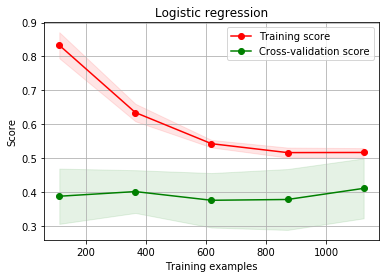

In [186]:
p=plot_learning_curve(grid.best_estimator_,"Logistic regression",train,Y_train,cv=10)

**EXTRATREES CLASSIFIER**


In [45]:
#step1:
etc=ExtraTreesClassifier(class_weight='balanced')
#step2:defining the grid
#trying hyper parameter tuning for lr
param_etc={
    'max_depth':[2,3,4,5],
    'max_features':['auto',5,10,15],
    'max_leaf_nodes':[2,4,3],
    'min_samples_leaf':range(10,30,5),
     'n_estimators':[10,5,20]
     
    }
#step3:kfold
kfold=KFold(n_splits=10,shuffle=True,random_state=7)

#step4:making grid search for the parameters
grid=GridSearchCV(etc,param_grid=param_etc,cv=kfold,n_jobs=-1,verbose=2)

#step5:fitting on the data
grid.fit(train,Y_train)

#step6:getting the best parameters
grid.best_estimator_,grid.best_score_,grid.best_params_

#step7:manually defining and deciding to chosse from the best params

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 1382 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 2514 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 3974 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 5751 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed:  1.5min finished


(ExtraTreesClassifier(bootstrap=False, class_weight='balanced', criterion='gini',
                      max_depth=2, max_features='auto', max_leaf_nodes=4,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False),
 0.460431654676259,
 {'max_depth': 2,
  'max_features': 'auto',
  'max_leaf_nodes': 4,
  'min_samples_leaf': 20,
  'n_estimators': 5})

In [55]:
etc=ExtraTreesClassifier(bootstrap=False, class_weight='balanced', criterion='gini',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=12,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

etc.fit(train,Y_train)
predicted_final=etc.predict(test)

id_code=list(id_code)
predicted_final=list(predicted_final)
submit_lr=pd.DataFrame(list(zip(id_code,predicted_final)),columns=["id_code","target"])
submit_lr.target[submit_lr.target==0]='low'
submit_lr.target[submit_lr.target==1]='medium'
submit_lr.target[submit_lr.target==2]='high'
submit_lr.to_csv("submit_etc_ht.csv",index=False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


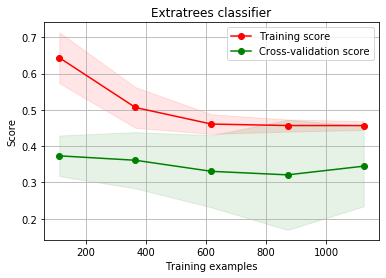

In [46]:
p=plot_learning_curve(grid.best_estimator_,"Extratrees classifier",train,Y_train,cv=10)

**RANDOMFOREST HYPERTUNING**


In [56]:
rfc=RandomForestClassifier(class_weight='balanced')
rfc.fit(train_x,train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [58]:
#step1:
rfc=RandomForestClassifier(class_weight='balanced')
#step2:defining the grid
#trying hyper parameter tuning for lr
param_rfc={
    'bootstrap':[False,True],
    'criterion':['gini','entropy'],
    'max_depth':[None,2,3,4,5],
    'max_features':['auto',5,10],
    'max_leaf_nodes':[None,2,4,3],
    'min_samples_leaf':range(20,50,5),
    'min_samples_split': range(2,20,10),
     'n_estimators':[10,5,20]
     
    }
#step3:kfold
kfold=KFold(n_splits=10,shuffle=True,random_state=7)

#step4:making grid search for the parameters
grid=GridSearchCV(rfc,param_grid=param_rfc,cv=kfold,n_jobs=-1,verbose=2)

#step5:fitting on the data
grid.fit(train,Y_train)

#step6:getting the best parameters
grid.best_estimator_,grid.best_score_,grid.best_params_

#step7:manually defining and deciding to chosse from the best params

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 1382 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 2514 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 3974 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 5754 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 7862 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 10290 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 13046 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 16122 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 19526 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 23250 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 27302 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 31674 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 36374 tas

(RandomForestClassifier(bootstrap=False, class_weight='balanced',
                        criterion='entropy', max_depth=None, max_features=5,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=25,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=20, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False),
 0.5203836930455635,
 {'bootstrap': False,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'max_leaf_nodes': None,
  'min_samples_leaf': 25,
  'min_samples_split': 2,
  'n_estimators': 20})

In [60]:
rfc=RandomForestClassifier(bootstrap=False, class_weight='balanced',
                        criterion='entropy', max_depth=None, max_features=5,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=25,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=20, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False)

rfc.fit(train,Y_train)
predicted_final=etc.predict(test)

id_code=list(id_code)
predicted_final=list(predicted_final)
submit_lr=pd.DataFrame(list(zip(id_code,predicted_final)),columns=["id_code","target"])
submit_lr.target[submit_lr.target==0]='low'
submit_lr.target[submit_lr.target==1]='medium'
submit_lr.target[submit_lr.target==2]='high'
submit_lr.to_csv("submit_rfc_ht.csv",index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


**ADABOOST WITH ETREES**


In [112]:


abc=AdaBoostClassifier(ExtraTreesClassifier(bootstrap=False, class_weight='balanced', criterion='gini',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=12,
                      min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)
)

#adaboosting classifier
abc.fit(train_x,train_y)
predicted=abc.predict(val_x)
#predicted_proba=abc.predict_proba(val_x)
from sklearn.metrics import confusion_matrix,classification_report,r2_score,auc
print(confusion_matrix(predicted,val_y))
print(classification_report(predicted,val_y))

print(r2_score(predicted,val_y))
#now training on the full dataset
abc.fit(train,Y_train)
predicted_final=abc.predict(test)

id_code=list(id_code)
predicted_final=list(predicted_final)
submit_abc_MI=pd.DataFrame(list(zip(id_code,predicted_final)),columns=["id_code","target"])
submit_abc_MI.target[submit_abc_MI.target==0]='low'
submit_abc_MI.target[submit_abc_MI.target==1]='medium'
submit_abc_MI.target[submit_abc_MI.target==2]='high'
submit_abc_MI.to_csv("submit_abc_ET_HT.csv",index=False)



[[115  38  21]
 [ 25  35  38]
 [ 25  24  55]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       174
           1       0.36      0.36      0.36        98
           2       0.48      0.53      0.50       104

    accuracy                           0.55       376
   macro avg       0.51      0.52      0.51       376
weighted avg       0.55      0.55      0.55       376

-0.1661781828401656


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**ADABOOST WITH RFC HYPERPARAMETER TUNED**


In [113]:


abc=AdaBoostClassifier(RandomForestClassifier(bootstrap=False, class_weight='balanced',
                        criterion='entropy', max_depth=None, max_features=5,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=25,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=20, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False))

#adaboosting classifier
abc.fit(train_x,train_y)
predicted=abc.predict(val_x)
#predicted_proba=abc.predict_proba(val_x)
from sklearn.metrics import confusion_matrix,classification_report,r2_score,auc
print(confusion_matrix(predicted,val_y))
print(classification_report(predicted,val_y))

print(r2_score(predicted,val_y))
#now training on the full dataset
abc.fit(train,Y_train)
predicted_final=abc.predict(test)

id_code=list(id_code)
predicted_final=list(predicted_final)
submit_abc_MI=pd.DataFrame(list(zip(id_code,predicted_final)),columns=["id_code","target"])
submit_abc_MI.target[submit_abc_MI.target==0]='low'
submit_abc_MI.target[submit_abc_MI.target==1]='medium'
submit_abc_MI.target[submit_abc_MI.target==2]='high'
submit_abc_MI.to_csv("submit_abc_RF_HT.csv",index=False)



[[112  35  22]
 [ 28  38  32]
 [ 25  24  60]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       169
           1       0.39      0.39      0.39        98
           2       0.53      0.55      0.54       109

    accuracy                           0.56       376
   macro avg       0.53      0.53      0.53       376
weighted avg       0.56      0.56      0.56       376

-0.14370640456563089


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
